# Name: Debjani Khan
# Computer Vision and IOT: The Sparks Foundation
## Task 1:Object detection in images and videos

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
#It gives the current directory we are working
%pwd

'C:\\Users\\Debjani Khan'

In [4]:
#It is used to change the directory , here I've changed it to the directory which contains all my files.
%cd C:\Users\Debjani Khan\Downloads

C:\Users\Debjani Khan\Downloads


In [5]:
#the pre-trained tensorflow model and configuration
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [6]:
model= cv2.dnn_DetectionModel(frozen_model,config_file)

In [7]:
ClassLabels = []
#coco dataset labels containing 80 classes are included in a text file named Labels
file_name = 'Labels.TXT'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [8]:
#printing the labels that I've appended
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
print(len(classLabels))

80


In [10]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)# for scaling we are converting 255/2=127.5
model.setInputMean((127.5,127.5,127.5))#mobilenet=[-1,1]
model.setInputSwapRB(True)

<dnn_Model 0000018C7F888F30>

In [11]:
#reading the image image_name.jpg
img = cv2.imread('right.jpg')

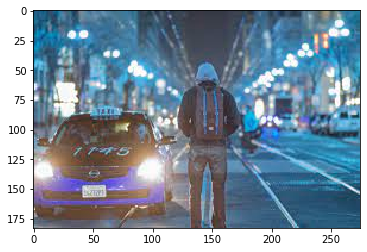

In [12]:
plt.imshow(img)

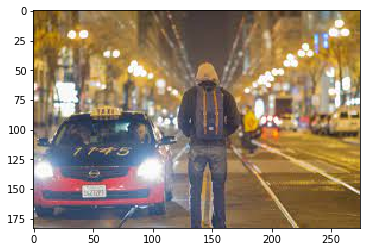

In [13]:
#converting BGR to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold = 0.5)

In [15]:
print(ClassIndex)#gives lists of object labels present

[[ 1]
 [ 3]
 [27]
 [ 3]
 [ 3]
 [ 1]]


In [16]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
    #cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.rectangle(img,boxes,(225,0,0),2)
    #cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontscale=font_scale,color=(0,0,0),thickness=1)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+10), font, fontScale=font_scale, color=(0,255,0),thickness=2)

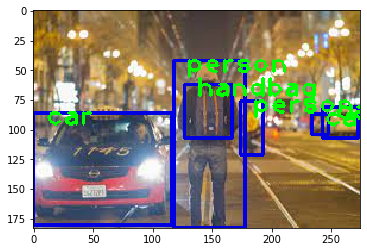

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Object Detection in video

In [18]:
#The name of the video file we want to detect object in ,is mentioned
cap = cv2.VideoCapture("My_video.mp4")#captures the image from the video

# to check whether the video is opened properly or not
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece , bbox = model.detect(frame,confThreshold = 0.5)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color = (0,255,0),thickness = 3 )
                
                cv2.imshow('Object Detection Tutorial',frame)
                
                if cv2.waitKey(2) & 0xFF == ord('q'):
                    break
                    
                    cap.release()
                    cv2.destroyAllWindows()

[[1]
 [1]
 [1]
 [3]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [10]]
[[1]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [3]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [3]
 [3]]
[[1]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [3]
 [1]]
[[1]
 [3]
 [1]
 [1]]
[[ 1]
 [ 3]
 [ 1]
 [ 1]
 [10]]
[[ 1]
 [ 3]
 [ 1]
 [ 1]
 [15]]
[[ 1]
 [ 3]
 [ 1]
 [ 1]
 [15]
 [10]]
[[ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [10]]
[[ 1]
 [ 1]
 [ 3]
 [ 3]
 [10]
 [ 1]
 [ 3]
 [ 3]]
[[ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [10]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [ 1]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [10]
 [ 1]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [10]
 [ 3]
 [ 1]
 [ 3]]
[[ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 1]
 [ 3]]
[[ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [10]
 [ 1]
 [ 1]]
[[ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]

KeyboardInterrupt: 